In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np

# Load cifar10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [2]:
from tensorflow.keras.utils import to_categorical 
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [3]:
from models import AE_w_predicter
model = AE_w_predicter(10)
model._compile()

In [4]:
model.train(train_images, train_labels, 256, 10)

Epoch 1/10:   0%|          | 0/196 [00:00<?, ?Batch/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 10/10: 100%|██████████| 196/196 [04:08<00:00,  1.27s/Batch, ae=0.0118, loss=0.448, pred=2.29]


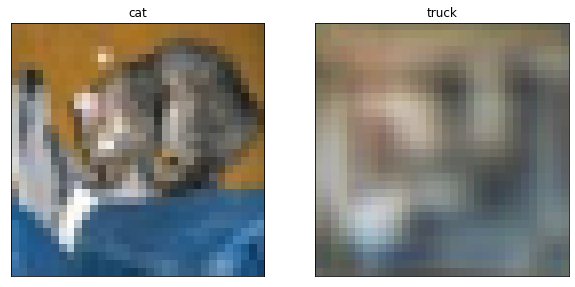

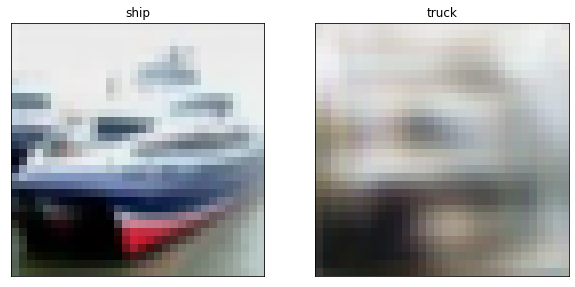

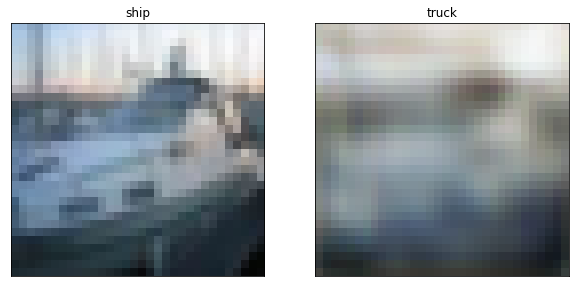

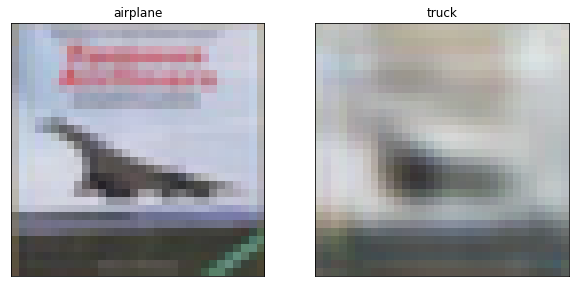

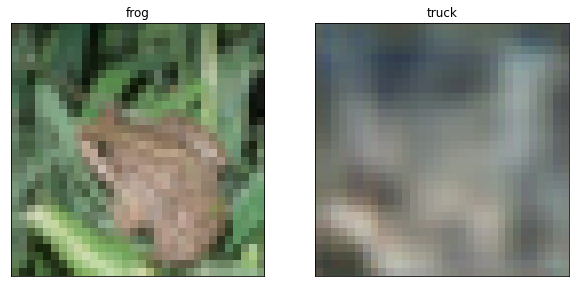

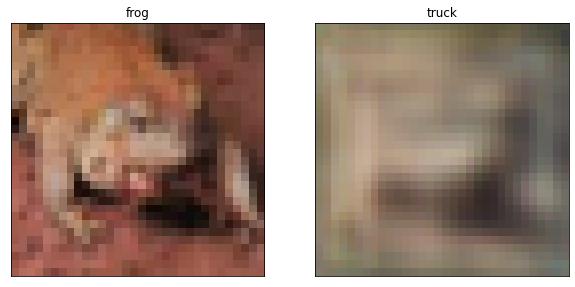

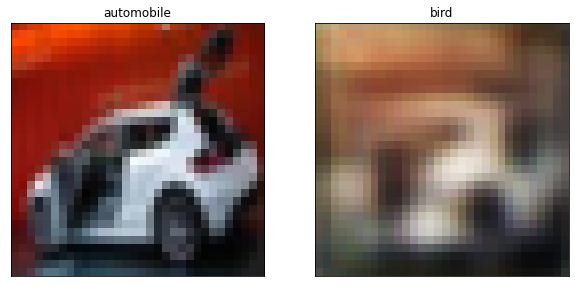

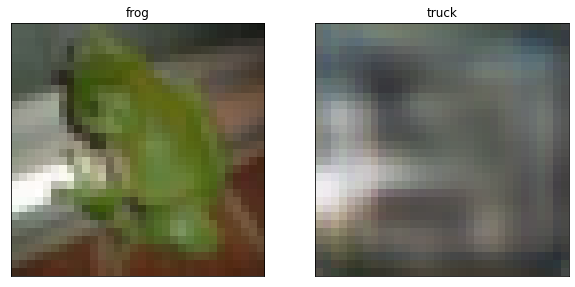

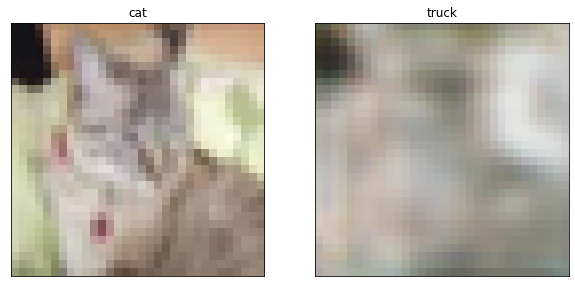

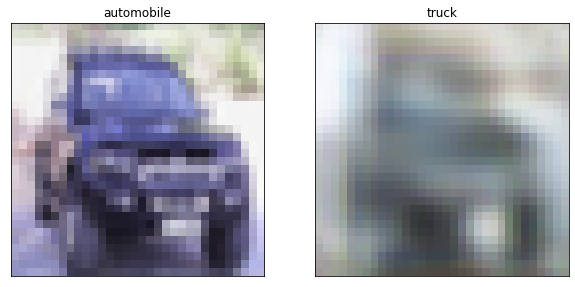

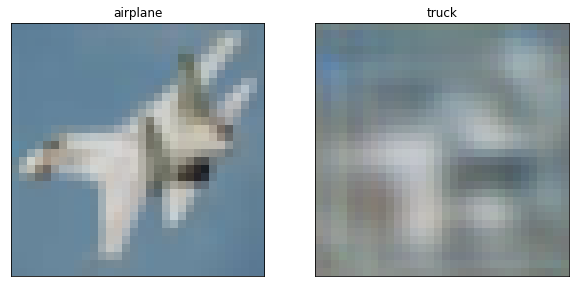

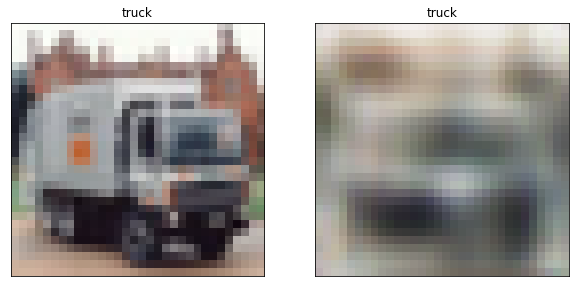

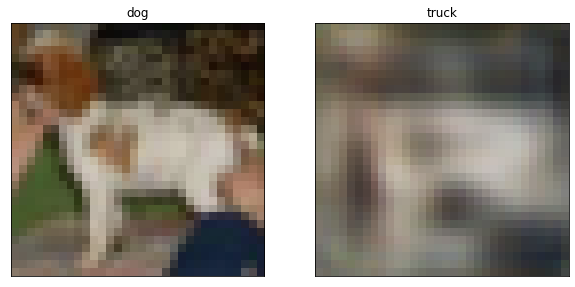

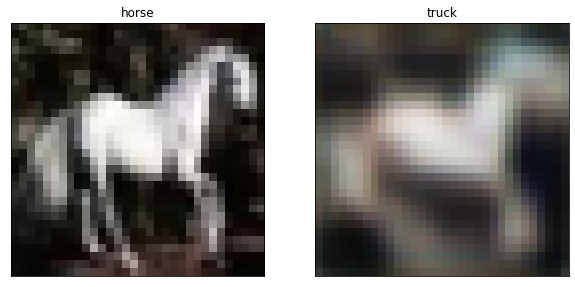

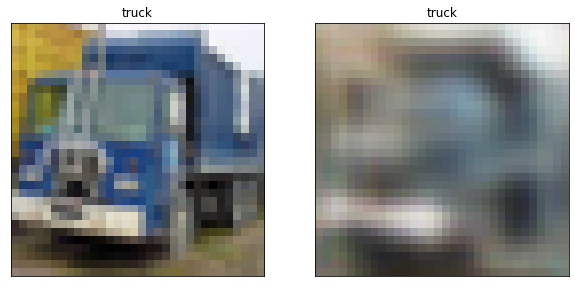

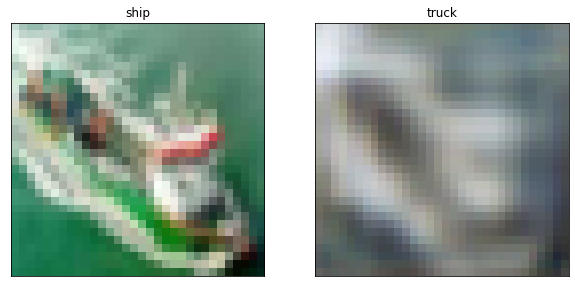

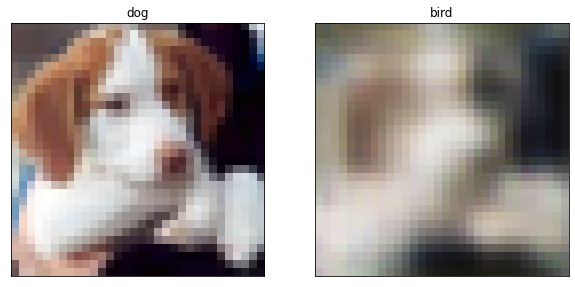

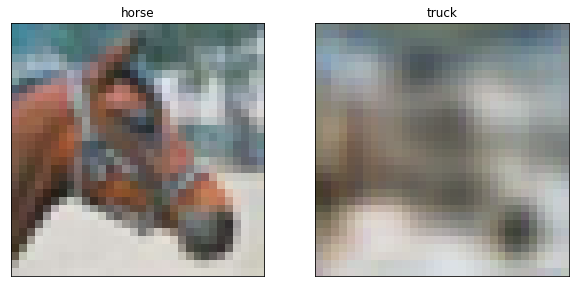

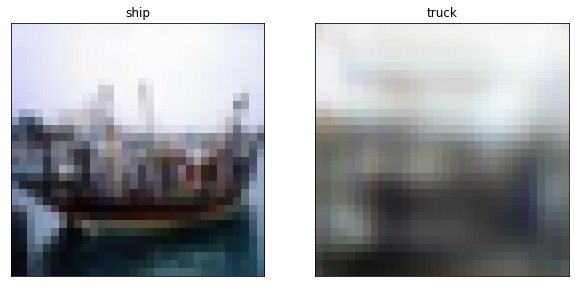

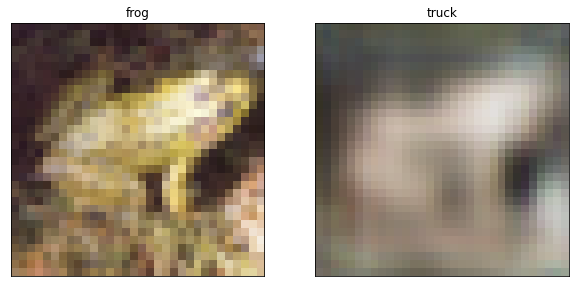

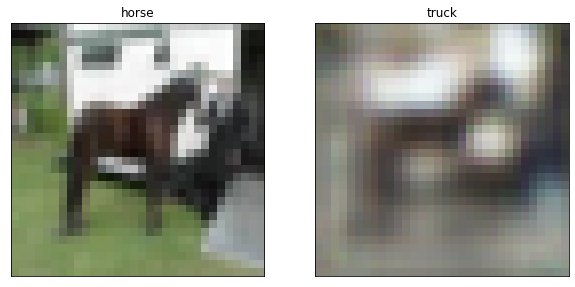

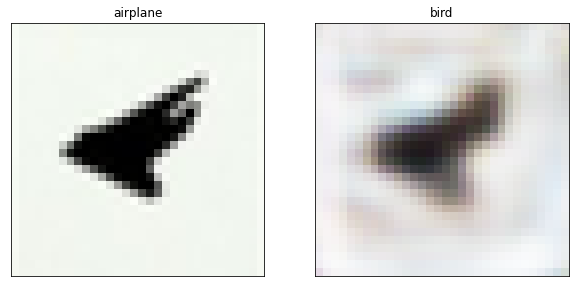

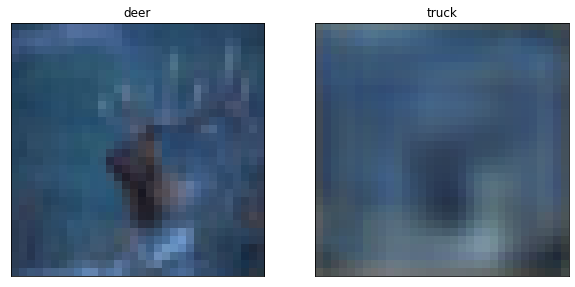

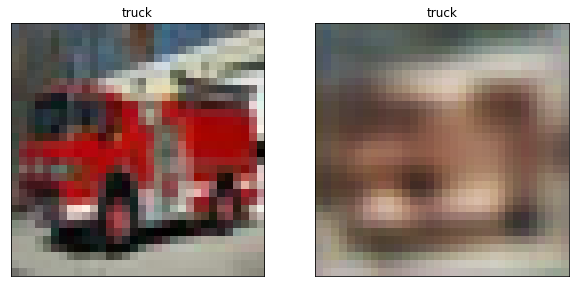

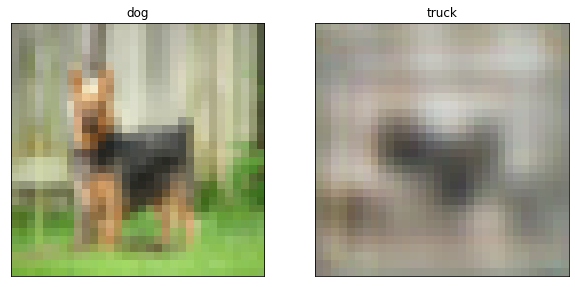

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
testn = 25
reconstruct, prediction = model(test_images[:testn])

for i in range(testn):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(test_labels[i])])
    plt.subplot(1, 2, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstruct[i], cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(prediction[i])])
    plt.show()